# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Yuval Levi - 325120384
2.   Maxim Katz - 322406604


In this assignemnt you will practice unsupervised methods we saw in class, and specifically running K-means and visualizing the data using PCA.

In this assignment you will learn a few more things:

1.   Load local files
2.   Load data from Kaggle
3. Use Scikit-learn K-means
4. Use Scikit-learn PCA
5. Some visulaization
6. Evaluate the performance of the clustering using Elbow methods, Siouhette analysis and accuracy (as we have true labels)

Note:
* Read the complete task before implementing.
* Reuse code, write functions.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
# Implement here
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from keras.datasets import mnist


# Text Clustering And Dimension Reduction

In this exercise you will cluster fake news using `k-means` and visualize the clustering using PCA.

**Import the Fake News Dataset from Kaggle**

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

After uploading the kaggle.json the fake news dataset will be copy to the enviroment in the '/content' directory. You will see the two files 'Fake.csv' and 'True.csv'.

For more about the dataset you can read [here](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset).

In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# extract the files
!unzip '/content/fake-and-real-news-dataset.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
 73% 30.0M/41.0M [00:00<00:00, 70.0MB/s]
100% 41.0M/41.0M [00:00<00:00, 67.6MB/s]
Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


## 1. Read the csv files and create one single dataframe (5 points)

*   Create a dataframe which is the join of the two files 'Fake.csv' and 'True.csv'.
*   Extract the 'text' column from each dataframe (droping title, subject and date columns).
*   Create a single dataframe containing a text column and a label column (fake=0, real=1).

In [ ]:
# Implement here
# Example for reading one file. It will work if the previous step was successful.
fake_df = pd.read_csv('/content/Fake.csv')
fake_df['label'] = 0

true_df = pd.read_csv('/content/True.csv')
true_df['label'] = 1

#joining the dataframes
df = pd.concat([fake_df[['text', 'label']], true_df[['text', 'label']]])



## 2. Cluster the samples into 2 clusters (real and fake) (15 points)

*   Generate TF-IDF features by applying the TfidfVectorizer preprocessor using 1000 features (`max_features=1000`) and remove English stop words.
* Scale the data.
*    Apply k-Means algorithm on the TF-IDF features using n_clusters=2.

In [ ]:
val = df['text'].tolist()
#TF-IDF generation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
vectors = vectorizer.fit_transform(val)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns=feature_names)

#scaling the data
df1 = StandardScaler().fit_transform(df1)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


**Applying k-Means algorithm on the TF-IDF features using n_clusters=2**

In [ ]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(df1)

## 3. Visualize using scatter plot (15 points)
The data is high dimensional, so for visualization purpose, we will perform a dimensionality reduction using PCA.

* Apply PCA
*   Visualize the clustering in 2d using first two PCs.
*   Visualize the clustering in 3d using first three PCs.

Notes:

*   In clustering visualization it's important to also visualize the centroids.
* Visualize using matplotlib scatter function. It can be used to plot 2D or 3D scatter plots.
* Color the points according to the true labels.

In [ ]:
# Finding the centers frm the k-Means algorithm
centers = clusterer.cluster_centers_

# Applying PCA and reduce the feature to 3 dimensions
pca = PCA(n_components=3)
pc = pca.fit_transform(list(centers) + list(df1))


In [ ]:
#sorting the data to the true data and fake data
labels = list(df['label'])
t_data , f_data = [], []
p_pca = pc[2:]
c_pca = pc[:2]

for i in range(len(p_pca)):
  if labels[i] == 1:
    t_data.append(p_pca[i])
  else:
    f_data.append(p_pca[i])

**K-Means 2D Plot**

<function matplotlib.pyplot.show(*args, **kw)>

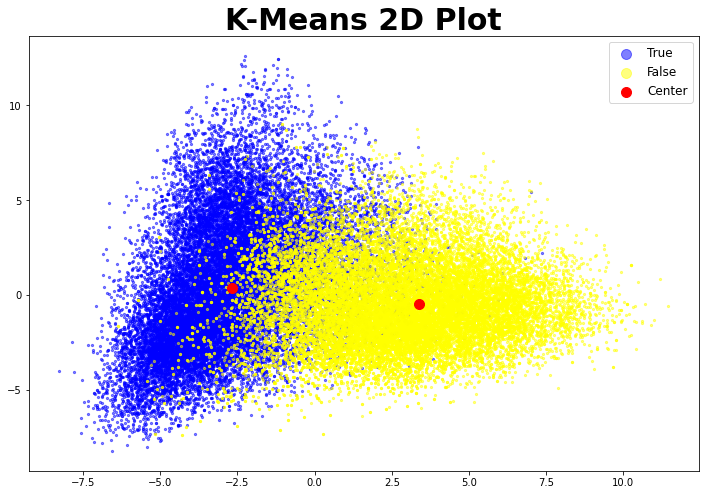

In [ ]:
f_data, t_data = np.array(f_data), np.array(t_data)

plt.figure(figsize=(12, 8))
plt.scatter(t_data[:, 0], t_data[:, 1], alpha=0.5, c="blue",s=5,label="True")
plt.scatter(f_data[:, 0], f_data[:, 1], alpha=0.5, c='yellow',s=5,label="False")
plt.scatter(c_pca[:,0], c_pca[:, 1], c='red', s=100,label = "Center")
plt.title("K-Means 2D Plot",fontweight='bold', size = 30)
leg = plt.legend(fontsize="large")
leg.legendHandles[0]._sizes = [100]
leg.legendHandles[1]._sizes = [100]
plt.show

**K-Means 3D Plot**

<function matplotlib.pyplot.show(*args, **kw)>

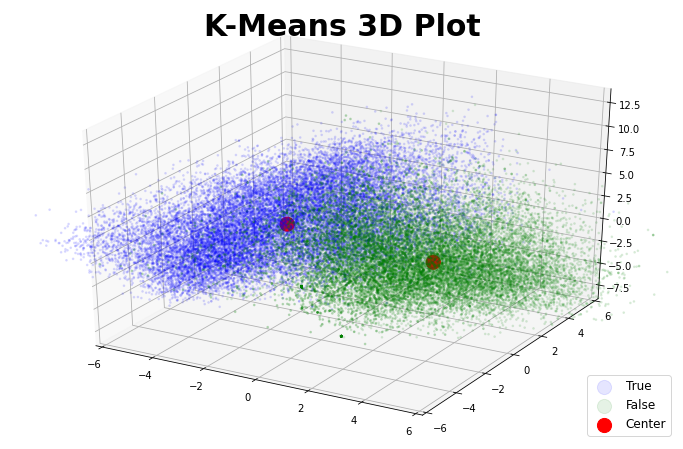

In [ ]:
plt.figure(figsize=(12, 8))
axs = plt.axes(projection='3d')
axs.scatter(t_data[:, 0], t_data[:, 1], t_data[:, 2], alpha=0.1, c="blue",s=3,label="True")
axs.scatter(f_data[:, 0], f_data[:, 1], f_data[:, 2], alpha=0.1, c='green',s=3,label="False")
axs.scatter(c_pca[:,0], c_pca[:, 1], c_pca[:, 2], c='red', alpha=1,  s=200,label = "Center")
plt.title("K-Means 3D Plot",fontweight='bold', size = 30)
leg = axs.legend(fontsize="large", loc=4)
plt.xlim(-6,6)
plt.ylim(-6,6)
leg.legendHandles[0]._sizes = [200]
leg.legendHandles[1]._sizes = [200]


plt.show

## 4. Performance evaluation (15 points)
### How did our clustering perform against the real labels?

We do have the true lables (fake/real), but we don't know which cluster correspond to which label. Therefore, we check the two options:

*   Define cluster 1 as fake and cluster 2 as real. What is the accuracy?
*   Define cluster 1 as true and cluster 2 as fake. What is the accuracy?

**Calculating the model accuracy for the 2 options**

In [ ]:

pred = clusterer.labels_
acc1 = metrics.accuracy_score(df['label'], pred)

pred1 = []
for i in range(len(pred)):
  if pred[i] == 0:
    pred1.append(1)
  else:
    pred1.append(0)


acc2 = metrics.accuracy_score(df['label'], pred1)


print("The accuracy when cluster 1 is fake and cluster 2 is real is: " + str(acc1))
print("The accuracy when cluster 1 is real and cluster 2 is fake is: " + str(acc2))

The accuracy when cluster 1 is fake and cluster 2 is real is: 0.8709296627912156
The accuracy when cluster 1 is real and cluster 2 is fake is: 0.12907033720878436


## 5. Find optimal `k` (10 points)
What is the best k for clustering?

* Cluster using a range of `k` (up to 20) and compare the SSD and the Silhouette values for every k.
* Plot SSD vs. k and Silhouette score vs. k.

Notes:
* You can get the SSD of a clustering using the `inertia_` attribute of the model.
* Silhouette score using `silhouette_score` function from `sklearn.metrics`. This function accept the model and the data.
* Computing Silhouette may takes long time. Estimate the Silhouette using a sample of 300 samples uisng the argument `sample_size=300`.

**Calculating the SSD values for each cluster from 1 to 20**

In [ ]:
inertia = []
for n in range(1 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    algorithm.fit(df1)
    inertia.append(algorithm.inertia_)

**Ploting the SSD values**

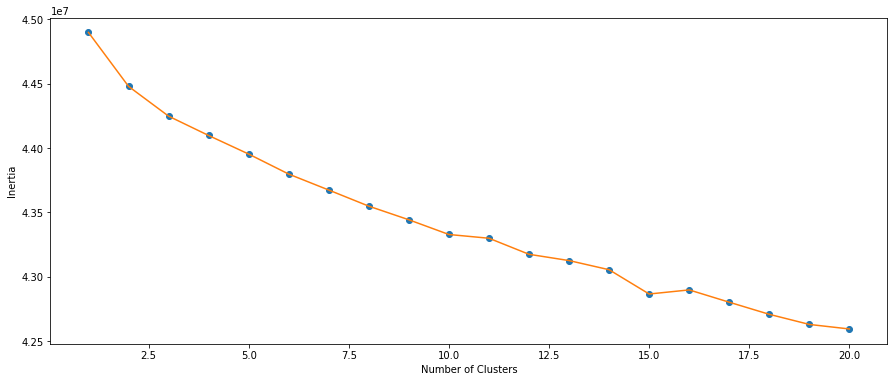

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 21) , inertia , 'o')
plt.plot(np.arange(1 , 21) , inertia , '-' , alpha = 1)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Calculating the Silhouette Score for each cluster from 2 to 20**





In [ ]:
sil = []
for n in range(2 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    label = algorithm.fit_predict(df1)
    sil.append(silhouette_score(df1, label, sample_size=300))

**Ploting the Silhouette Score values**

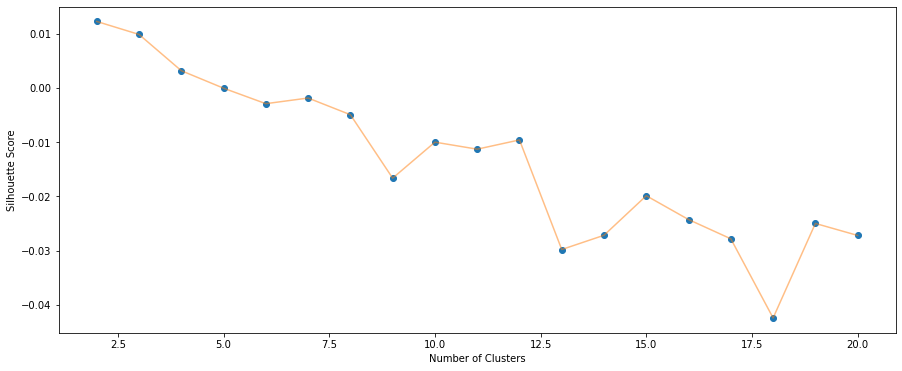

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 21) , sil , 'o')
plt.plot(np.arange(2 , 21) , sil , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

### 6. What is the optimal k for clustering? (10 points)

* Explain.
* If optimal k!=2 what can be a good explanation for this?

* We found that the optimal k for clustering is: **2**

  We figured it out using the Elbow method and the Silhouette score.

  In the first method, when we plot SSD, As we see in the visualization of an elbow and it was mentioned at the lectures, we assume that *Elbow* method in selecting the optimal number of clusters doesn’t always work because the function is decreasing for all ks monotoncally. So, beacuse of this we choose the optimal k=2.

  Therefore, In the second method on the silhouette score, in which we want to choose the maximal score, we assume that the optimal number of clusters is closest to 1.0. Thus, the silhouette score plot clearly shows that the optimal number of K to cluster is 2.
* If optimal k was not 2, one explanation could be that unlike our assumption of having 2 groups(true/fake), there might be a better way to distinct these k data groups from each other. Second explantation could be that we took more smoothest point (from here the function is smooth) in SSD at the Elbow method.

# 7. PCA then k-means (10 points)

1.   List item
2.   List item


This time, lets try to change the order.
1. Generate TF-IDF 1000 features
2. Run PCA (using all dimenssions)
3. Run k-means
4. Plot 2D and 3D scatter plots
5. Estimate the accuracy according to true labels.
6. Explain how is it compared to the previous approach, where clustering is performed w/o PCA.

Note:
* When you compute the PCA, don't limit to first PCs, but use all of them.

In [ ]:
val = df['text'].tolist()
#TF-IDF generation
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
vectors = vectorizer.fit_transform(val)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns=feature_names)

#scaling the data
df1 = StandardScaler().fit_transform(df1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Applying PCA
pca = PCA()
pc = pca.fit_transform(df1)

In [ ]:
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(pc)

In [ ]:
#sorting the data to the true data and fake data
labels = list(df['label'])
t_data , f_data = [], []


for i in range(len(p_pca)):
  if labels[i] == 1:
    t_data.append(pc[i])
  else:
    f_data.append(pc[i])

**K-Means 2D Plot**

<function matplotlib.pyplot.show(*args, **kw)>

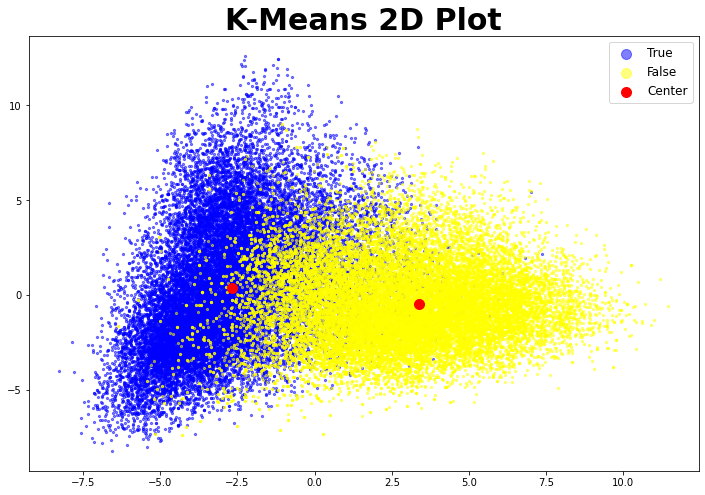

In [ ]:
f_data, t_data = np.array(f_data), np.array(t_data)
centers = clusterer.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(t_data[:, 0], t_data[:, 1], alpha=0.5, c="blue",s=5,label="True")
plt.scatter(f_data[:, 0], f_data[:, 1], alpha=0.5, c='yellow',s=5,label="False")
plt.scatter(centers[:,0], centers[:, 1], c='red', s=100,label = "Center")
plt.title("K-Means 2D Plot",fontweight='bold', size = 30)
leg = plt.legend(fontsize="large")
leg.legendHandles[0]._sizes = [100]
leg.legendHandles[1]._sizes = [100]
plt.show

**K-Means 3D Plot**

<function matplotlib.pyplot.show(*args, **kw)>

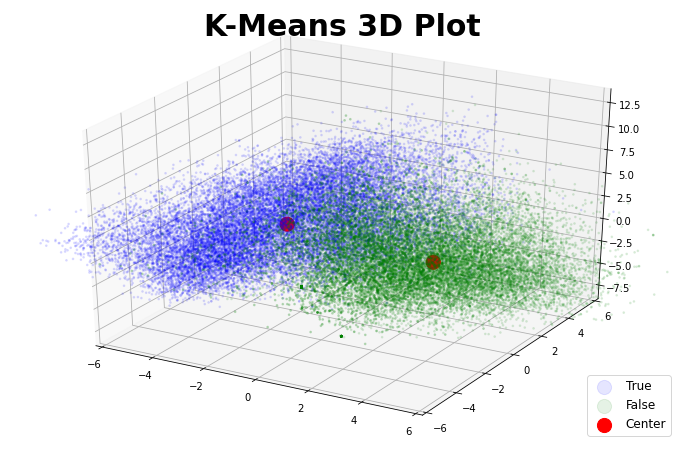

In [ ]:
plt.figure(figsize=(12, 8))
axs = plt.axes(projection='3d')
axs.scatter(t_data[:, 0], t_data[:, 1], t_data[:, 2], alpha=0.1, c="blue",s=3,label="True")
axs.scatter(f_data[:, 0], f_data[:, 1], f_data[:, 2], alpha=0.1, c='green',s=3,label="False")
axs.scatter(centers[:,0], centers[:, 1], centers[:, 2], c='red', alpha=1,  s=200,label = "Center")
plt.title("K-Means 3D Plot",fontweight='bold', size = 30)
leg = axs.legend(fontsize="large", loc=4)
plt.xlim(-6,6)
plt.ylim(-6,6)
leg.legendHandles[0]._sizes = [200]
leg.legendHandles[1]._sizes = [200]


plt.show

In [ ]:
pred = clusterer.labels_
acc1 = metrics.accuracy_score(df['label'], pred)
print("The model accuracy is: " + str(acc1))

The model accuracy is: 0.8709296627912156


**Explaination how is it compared to the previous approach, where clustering is performed w/o PCA**

As a conclusion of two approaches, first approach is PCA after kmeans runs and the other approach is PCA before kmeans runs, we see that the second approach works good enough as the first approach.

We expected to see that the second kmeans algorithm preform better and getting higher accuracy for clustering, because of the reduction of dimentionality and normalizing features as we learned at the lessons.
In the second approach, we used all of the PCA dimensions(1000 PC's) and give it to kmeans algorithm that managed to generalize roughly with the same accuracy (less than 0.001) and a plot that looks same to the naked eye.

To conclusion, We can assume that in this particular case, the k-means algorithm preformed quite well even without preforming PCA (like second approach).

# MNIST clustering (10 points)
Redo the same analysis, but this time using the MNIST data set. Notice that this time there are actually 10 'true' clusters.

1. What is the accuracy of the clustering when using k=10? \\
   * When for computing the accuracy of 10 classes, first you need to define what is the label of each cluster. Do that by majority votes. In theory, you may get two or more clusters with the same labels. We will ignore that for now. Meaning that you don't need to bother in case there are two clusters with the same label according to the majority vote. Simply count what is the fraction of 'other' digits in each cluster.
2. What is the optimal k?
3. How do the results changes if you first run PCA?

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# Conversion to float
train_X = train_X.astype('float32') 
test_X = test_X.astype('float32')
# Normalization
train_X = train_X/255.0
test_X = test_X/255.0
train_X = train_X.reshape(len(train_X),-1)
test_X = test_X.reshape(len(test_X),-1)
train = list(train_X) + list(test_X)
labels = list(train_y) + list(test_y)

In [ ]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_lab = clusterer.fit_predict(train)

In [ ]:
def retrieve_info(cluster_labels,y_train):

# Associates most probable label with each cluster in KMeans model
# returns: dictionary of clusters assigned to each label

# Initializing
  reference_labels = {}
  cluster_labels=np.array(cluster_labels)
  y_train=np.array(y_train)
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(clusterer.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [ ]:
reference_labels = retrieve_info(clusterer.labels_, labels)
number_labels = np.random.rand(len(clusterer.labels_))
for i in range(len(clusterer.labels_)):
  number_labels[i] = reference_labels[clusterer.labels_[i]]

**Calculating model accuracy**

In [ ]:
acc = metrics.accuracy_score(number_labels, labels)
print("The model accuracy is: " + str(acc))

0.5850285714285715

****Finding k****

**Calculating the SSD values for each cluster from 2 to 20**

In [ ]:
inertia = []
for n in range(2 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    algorithm.fit(train)
    inertia.append(algorithm.inertia_)

**Ploting the SSD values**

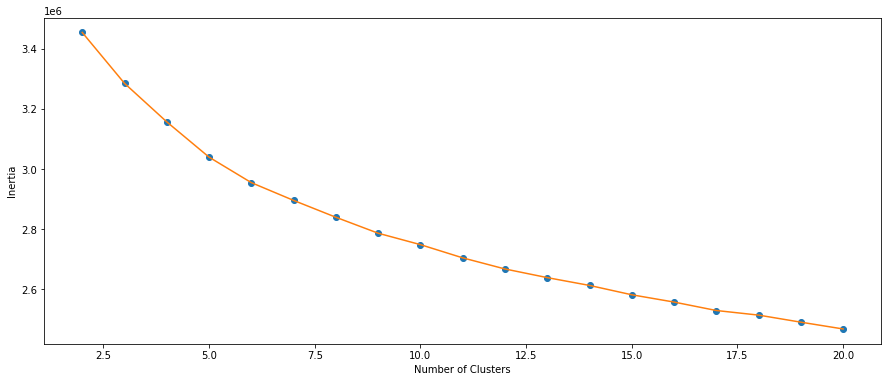

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 21) , inertia , 'o')
plt.plot(np.arange(2 , 21) , inertia , '-' , alpha = 1)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Calculating the Silhouette Score for each cluster from 2 to 20**

In [ ]:
sil = []
for n in range(2 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    label = algorithm.fit_predict(train)
    sil.append(silhouette_score(train, label, sample_size=300))

**Ploting the Silhouette Score values**

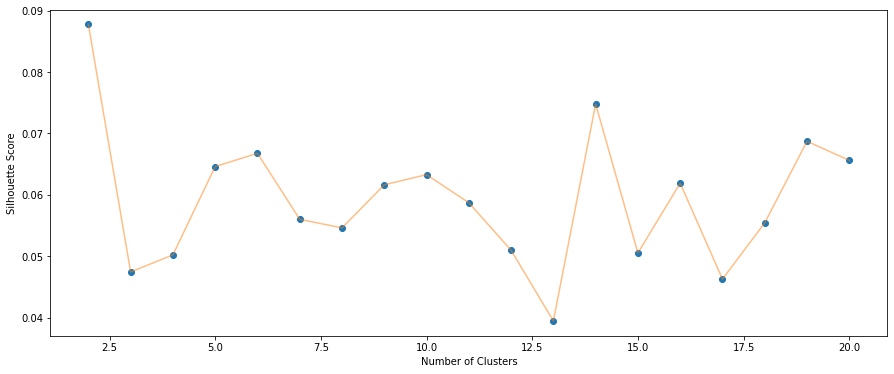

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 21) , sil , 'o')
plt.plot(np.arange(2 , 21) , sil , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

**As we did at the first section, we select the optimal K, using two methods. first one is Elbow method and the second is Silhouette score.
The optimal k that will fit the data will be k = 10, with this k we get the best results in both plots. In the SDD plot there is an "elbow" (from this point the function get smoother) between k=9 and k=10 but is no so important which one to choose, but it's the best we can find from Elbow plot. Also, we can assume it on the Silhouette score plot that we get k=10 as a local maximum in his area.**

**Applying PCA**

In [ ]:
pca = PCA()
tr = pca.fit_transform(train)

In [ ]:
clusterer = KMeans(n_clusters=10, random_state=10)
cluster_lab = clusterer.fit_predict(tr)

In [ ]:
reference_labels = retrieve_info(clusterer.labels_, labels)
number_labels = np.random.rand(len(clusterer.labels_))
for i in range(len(clusterer.labels_)):
  number_labels[i] = reference_labels[clusterer.labels_[i]]

**Calculating model accuracy**

In [ ]:
acc = metrics.accuracy_score(number_labels, labels)
print("The model accuracy is: " + str(acc))

The model accuracy is: 0.5850285714285715


**Finding K**

**Calculating the SSD values for each cluster from 2 to 20**

In [ ]:
inertia = []
for n in range(2 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    algorithm.fit(tr)
    inertia.append(algorithm.inertia_)

**Ploting the SSD values**

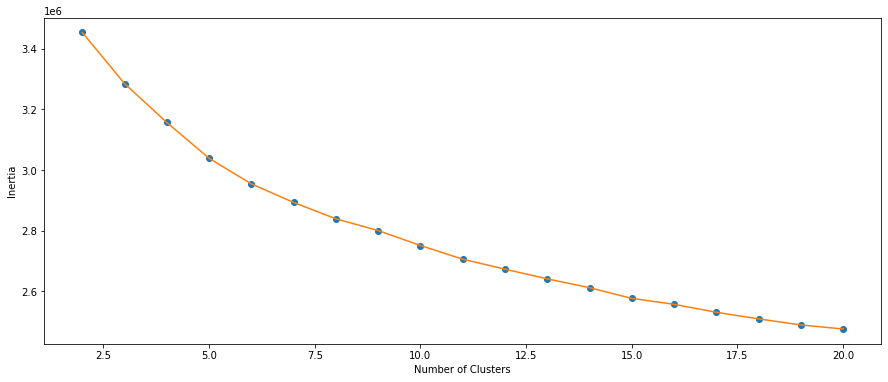

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 21) , inertia , 'o')
plt.plot(np.arange(2 , 21) , inertia , '-' , alpha = 1)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**Calculating the Silhouette Score for each cluster from 2 to 20**

In [ ]:
sil = []
for n in range(2 , 21):
    algorithm = KMeans(n_clusters = n ,max_iter=10) 
    label = algorithm.fit_predict(tr)
    sil.append(silhouette_score(tr, label, sample_size=300))

**Ploting the Silhouette Score values**

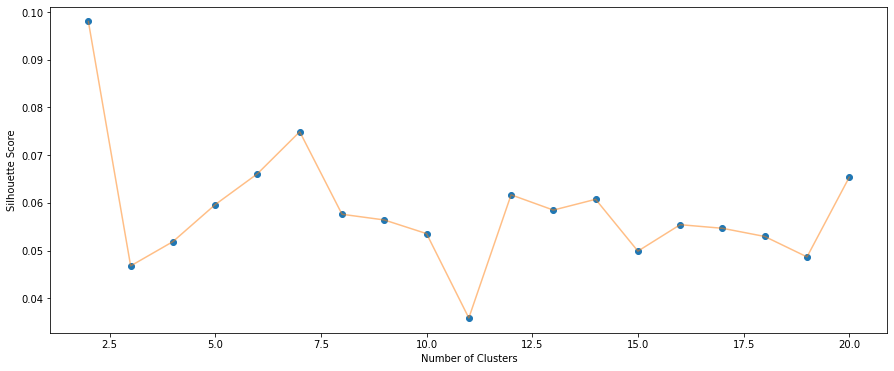

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 21) , sil , 'o')
plt.plot(np.arange(2 , 21) , sil , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

**The accuracy and the "Elbow" method of the second approach it's the same. But, the Silhouette graph is changed because we can see that a local maximum is k=7 and in this area at the "Elbow" plot it start to be smoother and smoother. So, we choose K=7 as an optimal k.**

**3. How do the results changes if you first run PCA?**



**The difference between two approaches is the optimal K. In the first approach (without PCA) we choose K=10. This means that we cluster then into 10 gruops in the optimal. On the other hand, In the second approach(with PCA before Kmeans) we choose K=7. This means that we cluster then into 7 gruops in the optimal. 
In conclusion, we see that number of groups was reduced beacuse the PCA.**

# Compute projection (10 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

In [ ]:
# Answer here and show your computations (no code)


**For the first vector we got 7. (1,2)X(1,3) = 1x1+3X2 = 7.
For the second vector we got 17. (1,2)X(3,7) = 3X1+2x7 = 17.**